# Data Science project to predict Data scientists salaries

## Exploratory Data Analysis

In [1]:
# Common libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('salary_data_cleaned.csv')

In [3]:
df.head()

,experience,job_description,job_desig,job_type,key_skills,location,salary,company_name_encoded,salary_avg,exp_avg,...,sk_python,sk_excel,sk_r,sk_time_series,sk_regression,sk_NN,sk_ML,sk_spark,sk_hadoop,sk_sql
0,5-7 yrs,Exp: Minimum 5 years;Good understanding of IOC...,Senior Exploit and Vulnerability Researcher,NaN,"team skills, communication skills, analytical ...",Delhi NCR(Vikas Puri),6to10,3687,8.0,6.0,...,0,0,0,0,0,0,0,0,0,0
1,10-17 yrs,He should have handled a team of atleast 5-6 d...,Head SCM,NaN,"ppc, logistics, inventory management, supply c...",Sonepat,10to15,458,12.5,13.5,...,0,0,0,0,0,0,0,0,0,0
2,5-9 yrs,Must be an effective communicator (written & s...,Deputy Manager - Talent Management & Leadershi...,Analytics,"HR Analytics, Employee Engagement, Training, S...",Delhi NCR,15to25,4195,20.0,7.0,...,0,0,0,0,0,0,0,0,0,0
3,7-10 yrs,7 - 10 years of overall experience in data e...,Associate Manager Data Engineering,Analytics,"SQL, Javascript, Automation, Python, Ruby, Ana...",Bengaluru,10to15,313,12.5,8.5,...,1,0,0,0,0,0,1,0,0,1
4,1-3 yrs,Chartered Accountancy degree or MBA in Finance...,TS- GSA- Senior Analyst,NaN,"accounting, finance, cash flow, financial plan...",Gurgaon,3to6,1305,4.5,2.0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.columns

Index(['experience', 'job_description', 'job_desig', 'job_type', 'key_skills',
       'location', 'salary', 'company_name_encoded', 'salary_avg', 'exp_avg',
       'description_length', 'key_skills_length', 'location_abbreviation',
       'job_simplified', 'seniority_simplified', 'jd_senior', 'jd_manager',
       'jd_junior', 'jd_architect', 'jd_engineer', 'jd_analyst',
       'jd_developer', 'jd_director', 'sk_python', 'sk_excel', 'sk_r',
       'sk_time_series', 'sk_regression', 'sk_NN', 'sk_ML', 'sk_spark',
       'sk_hadoop', 'sk_sql'],
      dtype='object')

In [5]:
df['salary_avg'].value_counts()

12.5    4500
20.0    4125
8.0     3533
1.5     3245
4.5     2824
37.5    1575
Name: salary_avg, dtype: int64

In [6]:
df.columns

Index(['experience', 'job_description', 'job_desig', 'job_type', 'key_skills',
       'location', 'salary', 'company_name_encoded', 'salary_avg', 'exp_avg',
       'description_length', 'key_skills_length', 'location_abbreviation',
       'job_simplified', 'seniority_simplified', 'jd_senior', 'jd_manager',
       'jd_junior', 'jd_architect', 'jd_engineer', 'jd_analyst',
       'jd_developer', 'jd_director', 'sk_python', 'sk_excel', 'sk_r',
       'sk_time_series', 'sk_regression', 'sk_NN', 'sk_ML', 'sk_spark',
       'sk_hadoop', 'sk_sql'],
      dtype='object')

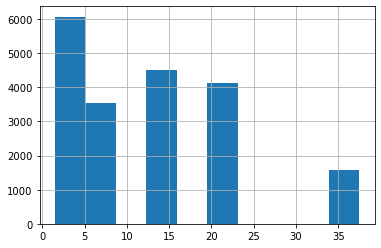

In [7]:
df.salary_avg.hist()

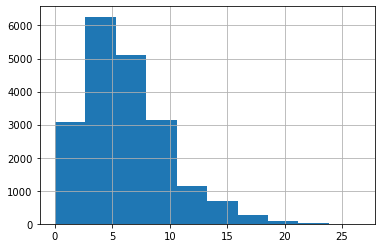

In [8]:
df.exp_avg.hist()

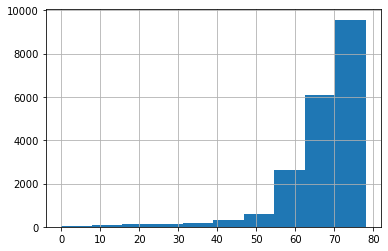

In [9]:
df.key_skills_length.hist()

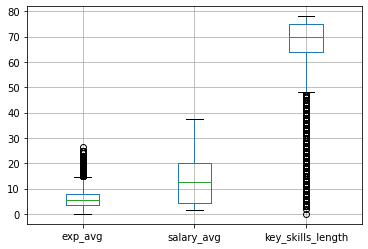

In [10]:
df.boxplot(column=['exp_avg', 'salary_avg', 'key_skills_length'])

In [11]:
corr = df[['exp_avg', 'salary_avg', 'key_skills_length', 'description_length', 'company_name_encoded']].corr()
corr

,exp_avg,salary_avg,key_skills_length,description_length,company_name_encoded
exp_avg,1.000000,0.663750,0.036510,0.213845,0.040014
salary_avg,0.663750,1.000000,0.056025,0.275696,0.052624
key_skills_length,0.036510,0.056025,1.000000,0.079500,-0.004213
description_length,0.213845,0.275696,0.079500,1.000000,0.064437
company_name_encoded,0.040014,0.052624,-0.004213,0.064437,1.000000


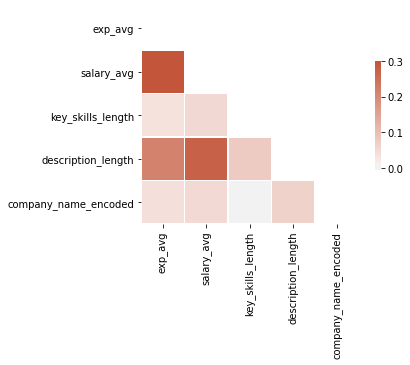

In [12]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [13]:
df.columns

Index(['experience', 'job_description', 'job_desig', 'job_type', 'key_skills',
       'location', 'salary', 'company_name_encoded', 'salary_avg', 'exp_avg',
       'description_length', 'key_skills_length', 'location_abbreviation',
       'job_simplified', 'seniority_simplified', 'jd_senior', 'jd_manager',
       'jd_junior', 'jd_architect', 'jd_engineer', 'jd_analyst',
       'jd_developer', 'jd_director', 'sk_python', 'sk_excel', 'sk_r',
       'sk_time_series', 'sk_regression', 'sk_NN', 'sk_ML', 'sk_spark',
       'sk_hadoop', 'sk_sql'],
      dtype='object')

In [14]:
df_cat = df[['location_abbreviation', 'job_simplified', 'seniority_simplified', 'jd_senior', 'jd_manager',
       'jd_junior', 'jd_architect', 'jd_engineer', 'jd_analyst',
       'jd_developer', 'jd_director', 'sk_python', 'sk_r', 'sk_time_series',
       'sk_regression', 'sk_NN', 'sk_ML', 'sk_spark', 'sk_hadoop', 'sk_sql']]

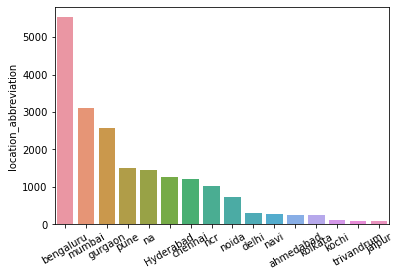

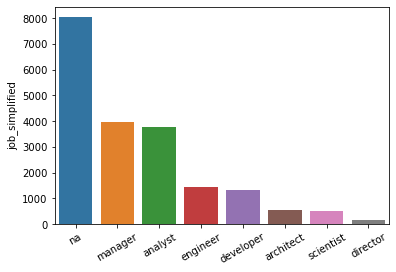

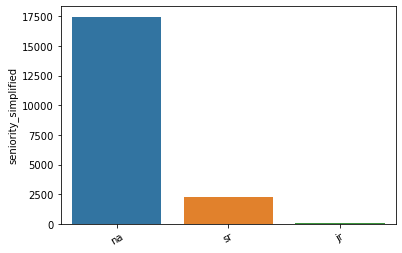

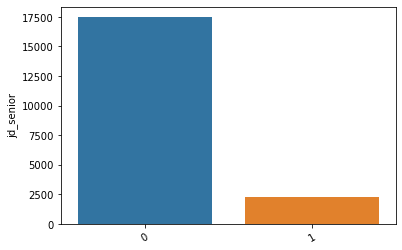

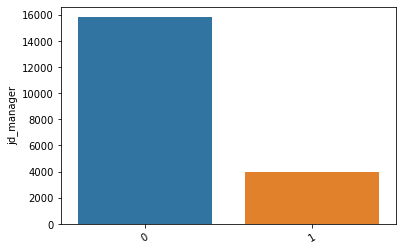

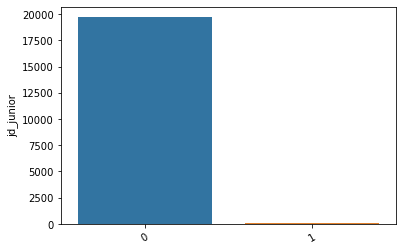

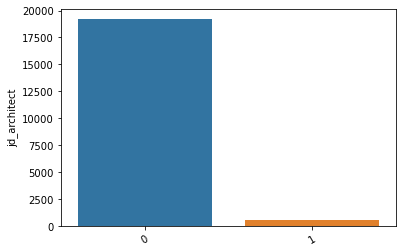

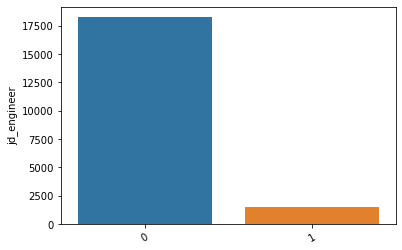

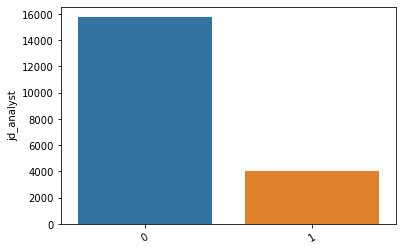

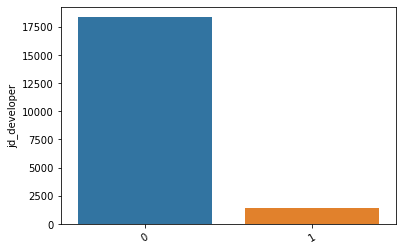

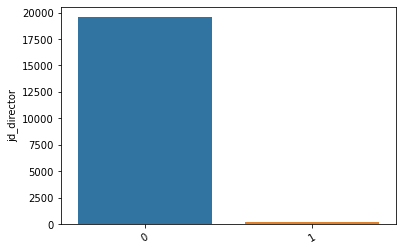

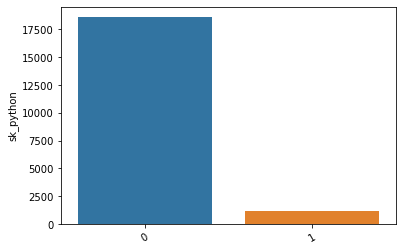

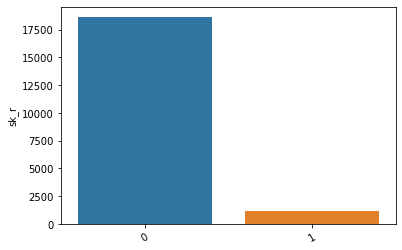

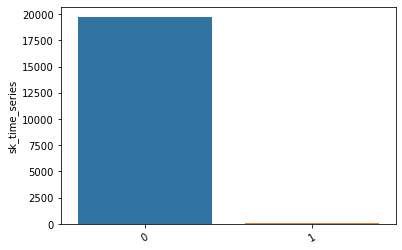

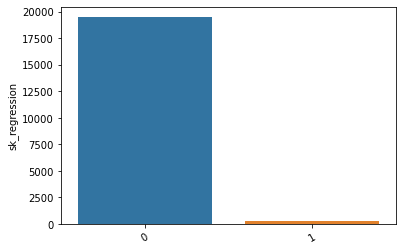

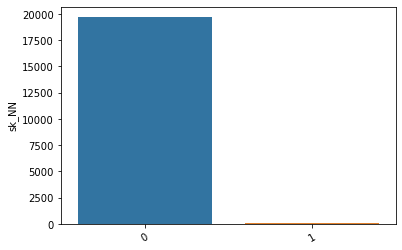

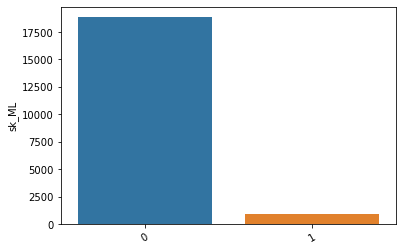

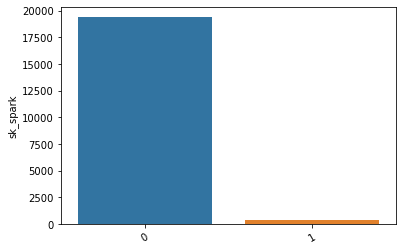

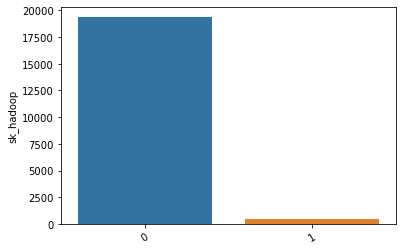

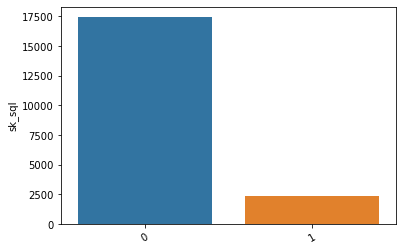

In [15]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=30)
    plt.show()

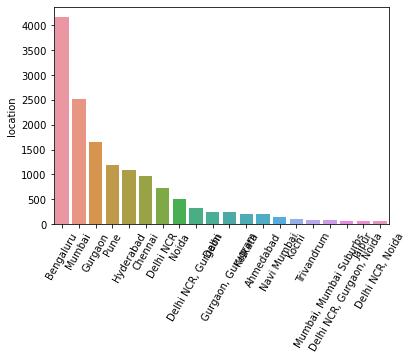

In [16]:
cat_num = df['location'].value_counts()[:20]
chart = sns.barplot(x=cat_num.index, y=cat_num)
chart.set_xticklabels(chart.get_xticklabels(), rotation=60)
plt.show()

In [17]:
pd.pivot_table(df, index = 'job_simplified', values = 'salary_avg')

,salary_avg
job_simplified,
analyst,9.624835
architect,20.202899
developer,11.195976
director,25.049708
engineer,12.644938
manager,15.153012
na,11.224565
scientist,16.190335


In [18]:
pd.pivot_table(df, index = ['job_simplified', 'seniority_simplified'], values = 'salary_avg')

salary_avg
job_simplified seniority_simplified            
analyst        jr                      4.978261
               na                      9.341441
               sr                     11.468240
architect      jr                     12.500000
               na                     20.071563
               sr                     24.075000
developer      jr                      4.166667
               na                     11.016883
               sr                     12.571823
director       na                     25.156442
               sr                     22.875000
engineer       jr                      5.875000
               na                     12.631939
               sr                     12.803371
manager        jr                     11.250000
               na                     14.314316
               sr                     19.171739
na             jr                      8.615385
               na                     11.169933
               sr                     12.066414
scientist      na                     15.807522
               sr                     19.336364

In [19]:
pd.pivot_table(df, index = 'location_abbreviation', values = 'salary_avg').sort_values('salary_avg', ascending = False)

,salary_avg
location_abbreviation,
bengaluru,13.509495
ncr,13.432617
gurgaon,12.923197
mumbai,12.800711
Hyderabad,12.251965
pune,11.683066
na,11.402664
chennai,10.385408
noida,10.188692


In [20]:
pd.options.display.max_rows
pd.set_option('display.max_rows', None)
pd.pivot_table(df, index = ['location_abbreviation','job_simplified'], values = 'salary_avg', aggfunc = 'count')

salary_avg
location_abbreviation job_simplified            
Hyderabad             analyst                236
                      architect               51
                      developer              128
                      director                27
                      engineer               114
                      manager                174
                      na                     503
                      scientist               39
ahmedabad             analyst                 27
                      architect                5
                      developer               14
                      director                 4
                      engineer                17
                      manager                 46
                      na                     146
                      scientist                2
bengaluru             analyst               1024
                      architect              259
                      developer              423
                      director                44
                      engineer               626
                      manager                939
                      na                    2038
                      scientist              176
chennai               analyst                277
                      architect               32
                      developer              107
                      director                13
                      engineer                92
                      manager                173
                      na                     494
                      scientist               25
delhi                 analyst                 46
                      architect                3
                      developer               20
                      director                 4
                      engineer                15
                      manager                 79
                      na                     139
                      scientist                8
gurgaon               analyst                500
                      architect               26
                      developer              126
                      director                30
                      engineer               105
                      manager                690
                      na                    1020
                      scientist               68
jaipur                analyst                 18
                      developer                4
                      engineer                 2
                      manager                 27
                      na                      36
kochi                 analyst                 30
                      architect                2
                      developer               10
                      director                 2
                      engineer                10
                      manager                 13
                      na                      55
kolkata               analyst                 40
                      architect                2
                      developer               14
                      engineer                13
                      manager                 33
                      na                     137
                      scientist               14
mumbai                analyst                600
                      architect               38
                      developer              141
                      director                21
                      engineer               121
                      manager                821
                      na                    1290
                      scientist               64
na                    analyst                255
                      architect               19
                      developer               72
                      director                13
                      engineer                90
                    

In [21]:
pd.pivot_table(df[df['job_simplified'] == 'scientist'], index = 'location_abbreviation', values = 'salary_avg').sort_values('salary_avg', ascending = False)

,salary_avg
location_abbreviation,
navi,37.500000
bengaluru,18.383523
pune,17.400000
trivandrum,16.250000
gurgaon,16.242647
noida,15.892857
chennai,15.580000
ncr,15.227273
delhi,14.437500


In [22]:
df.columns

Index(['experience', 'job_description', 'job_desig', 'job_type', 'key_skills',
       'location', 'salary', 'company_name_encoded', 'salary_avg', 'exp_avg',
       'description_length', 'key_skills_length', 'location_abbreviation',
       'job_simplified', 'seniority_simplified', 'jd_senior', 'jd_manager',
       'jd_junior', 'jd_architect', 'jd_engineer', 'jd_analyst',
       'jd_developer', 'jd_director', 'sk_python', 'sk_excel', 'sk_r',
       'sk_time_series', 'sk_regression', 'sk_NN', 'sk_ML', 'sk_spark',
       'sk_hadoop', 'sk_sql'],
      dtype='object')

In [23]:
df_pivots = df[['salary_avg', 'exp_avg', 'description_length', 'key_skills_length', 'location_abbreviation', 'job_simplified', 'seniority_simplified', 'jd_senior', 'jd_manager', 'jd_junior', 'jd_architect', 'jd_engineer', 'jd_analyst', 'jd_developer', 'jd_director', 'sk_python', 'sk_excel', 'sk_r', 'sk_time_series', 'sk_regression', 'sk_NN', 'sk_ML', 'sk_spark', 'sk_hadoop', 'sk_sql']]
df_pivots.columns

Index(['salary_avg', 'exp_avg', 'description_length', 'key_skills_length',
       'location_abbreviation', 'job_simplified', 'seniority_simplified',
       'jd_senior', 'jd_manager', 'jd_junior', 'jd_architect', 'jd_engineer',
       'jd_analyst', 'jd_developer', 'jd_director', 'sk_python', 'sk_excel',
       'sk_r', 'sk_time_series', 'sk_regression', 'sk_NN', 'sk_ML', 'sk_spark',
       'sk_hadoop', 'sk_sql'],
      dtype='object')

In [24]:
for i in df_pivots.columns:
    if i != 'salary_avg':
        print(pd.pivot_table(df_pivots, index = i, values = 'salary_avg').sort_values('salary_avg', ascending = False))

         salary_avg
exp_avg            
26.5      37.500000
24.0      37.500000
22.5      37.500000
20.5      37.500000
17.5      31.521739
16.0      30.773333
21.5      29.583333
21.0      28.928571
17.0      28.642857
20.0      28.636364
16.5      28.350000
18.0      28.068182
14.0      28.022472
18.5      27.785714
14.5      26.212963
15.0      25.211610
13.0      24.613636
15.5      24.555556
13.5      24.273810
12.5      23.346076
19.5      23.333333
11.5      22.583691
19.0      21.500000
12.0      20.553571
10.5      20.344618
10.0      19.905844
9.5       19.525874
25.0      19.083333
11.0      18.126316
9.0       17.216606
8.5       17.089781
8.0       16.274533
22.0      16.250000
7.5       15.332984
7.0       13.498753
6.5       13.445935
23.0      12.500000
6.0       12.174834
5.5       11.871383
5.0       10.276298
4.0        8.845374
4.5        8.702017
3.5        6.999153
3.0        6.474790
2.5        4.743627
2.0        4.518519
1.5        3.571429
1.0        2.613402


In [25]:
pd.pivot_table(df_pivots, index = 'job_simplified', columns = 'sk_spark', values = 'salary_avg', aggfunc='count')

sk_spark,0,1
job_simplified,,
analyst,3757.0,24.0
architect,493.0,59.0
developer,1281.0,61.0
director,171.0,NaN
engineer,1335.0,107.0
manager,3949.0,18.0
na,7959.0,81.0
scientist,459.0,48.0


In [42]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\alexa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\alexa\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


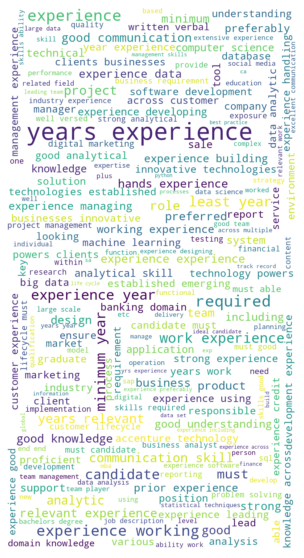

In [46]:
def punctuation_stop(text):
    # Remove punctuacion and stop words
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered

job_aux = df['job_description'].apply(lambda x: '' if isinstance(x, float) else x)
words_job = " ".join(job_aux)

words_job_filtered = punctuation_stop(words_job)

text = " ".join([ele for ele in words_job_filtered])

wc = WordCloud(background_color='white', random_state=1, stopwords=STOPWORDS, max_words=200, width=800, height=1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

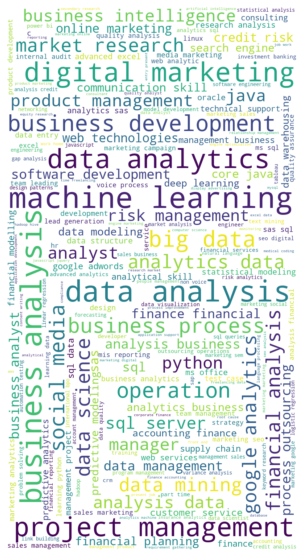

In [47]:
skill_aux = df['key_skills'].apply(lambda x: '' if isinstance(x, float) else x)
words_skills = " ".join(skill_aux)

words_skills_filtered = punctuation_stop(words_skills)

text = " ".join([ele for ele in words_skills_filtered])

wc = WordCloud(background_color='white', random_state=1, stopwords=STOPWORDS, max_words=200, width=800, height=1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()